Before normalization:
Time        float64
Price         int64
Quantity      int64
dtype: object
After normalization:
Time        datetime64[ns]
Price              float64
Quantity           float64
dtype: object
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32


c:\Users\tlext\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([64, 2])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Tar

c:\Users\tlext\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([30, 2])) that is different to the input size (torch.Size([30, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Targets dtype: torch.float32
Inputs dtype: torch.float32
Tar

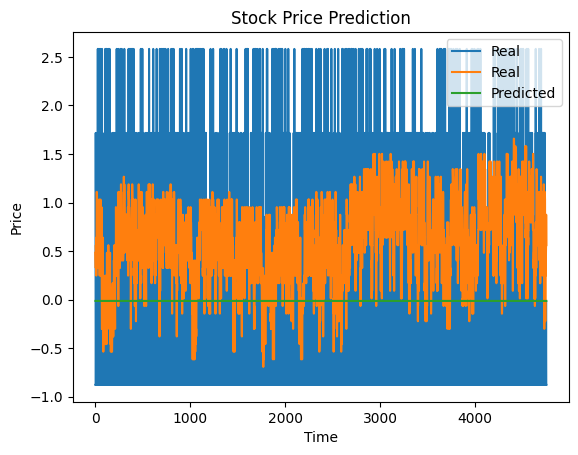

In [26]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



class TFT(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers, sequence_length):
        super(TFT, self).__init__()
        self.encoder = nn.TransformerEncoderLayer(d_model=input_size, nhead=2)
        self.decoder = nn.TransformerDecoderLayer(d_model=input_size, nhead=2)
        self.fc = nn.Linear(input_size * sequence_length, output_size)

    def forward(self, x):
        # Convert inputs to torch.float32
        x = x.float()
        encoder_output = self.encoder(x)
        decoder_output = self.decoder(x, encoder_output)  # Pass encoder_output as memory
        # Reshape decoder output for linear layer
        flattened_output = decoder_output.permute(1, 0, 2).contiguous().view(x.size(0), -1)
        flattened_output = flattened_output.float()  # Convert to torch.float32
        x = self.fc(flattened_output)
        return x

 
class StockDataset(Dataset):
    def __init__(self, data, sequence_length):
        self.data = data
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        features = self.data[idx:idx+self.sequence_length]
        target = self.data[idx+self.sequence_length]
        return features, target

# Load and preprocess the dataset
def load_data(filename):
    data = pd.read_csv(r"C:\Users\tlext\Desktop\tapes tft test.csv")
    print("Before normalization:")
    print(data.dtypes)
    
    # Convert timestamp column to datetime
    data['Time'] = pd.to_datetime(data['Time'])
    
    # Normalize numerical columns
    scaler = StandardScaler()
    data[['Quantity', 'Price']] = scaler.fit_transform(data[['Quantity', 'Price']])
    print("After normalization:")
    print(data.dtypes)
    
    # Convert data to torch.float32
    data['Quantity'] = data['Quantity'].astype(np.float32)
    data['Price'] = data['Price'].astype(np.float32)

    return data

# Train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        for inputs, targets in train_loader:
            print("Inputs dtype:", inputs.dtype)
            print("Targets dtype:", targets.dtype)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        predictions = []
        targets = []
        for inputs, target in test_loader:
            outputs = model(inputs)
            # Convert targets to the same data type as outputs
            target = target.to(outputs.dtype)
            predictions.append(outputs)
            targets.append(target)
        predictions = torch.cat(predictions).numpy()
        targets = torch.cat(targets).numpy()
    return predictions, targets

# Main function
def main():
    # Load and preprocess the dataset
    filename = 'tapes tft test.csv'
    data = load_data(filename)

    # Split the dataset into training and test sets
    train_size = int(0.8 * len(data))
    train_data, test_data = data[:train_size], data[train_size:]

    # Define hyperparameters
    input_size = 2  # number of input features (quantity and price)
    output_size = 1  # number of output features (price)
    hidden_size = 64
    num_layers = 2
    sequence_length = 10
    batch_size = 64
    learning_rate = 0.001
    num_epochs = 10

    # Create dataset and data loaders
    train_dataset = StockDataset(train_data[['Quantity', 'Price']].values, sequence_length)
    test_dataset = StockDataset(test_data[['Quantity', 'Price']].values, sequence_length)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize the model, loss function, and optimizer
    model = TFT(input_size, output_size, hidden_size, num_layers, sequence_length)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    train_model(model, train_loader, criterion, optimizer, num_epochs)

    # Test the model
    predictions, targets = test_model(model, test_loader)

    # Plot predictions against real values
    plt.plot(targets, label='Real')
    plt.plot(predictions, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Stock Price Prediction')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
